# Chapter 5 – Pandas Data Wrangling


Main reference:<br>
- Chapter 8-11, Python for Data Analysis, by Wes McKinney
- [No. 10](https://python-programming.quantecon.org/matplotlib.html), Python Programming for Economics and Finance, by Thomas J. Sargent & John Stachurski

Last edited: 05/16/2021

**Contents of this Notebook:**

- [Section 1. Combining and Merging Dataset](#Section-1.-Combining-and-Merging-Dataset)
- [Section 2. Data Aggregation and Group Operations](#Section-2.-Data-Aggregation-and-Group-Operations) (05/12/2021 updated)
- [Section 3. Date and Time Data Types and Tools](#Section-3.-Date-and-Time-Data-Types-and-Tools)
- [Section 4. Plotting and Visualization](#Section-4.-Plotting-and-Visualization) (05/12/2021 updated)
- [Section 5. Compustat](#Section-5.-Compustat) (05/12/2021 updated)

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

## Section 1. Combining and Merging Dataset

In [1]:
# %load_ext nb_black
# Import the necessary libraries
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

There are two main methods to combine two datasets:

- `pandas.merge` connects rows in DataFrames based on one or more keys.

- `pandas.concat` concatenates or “stacks” together objects along an axis.

In [2]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"], "data1": range(7)})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


<IPython.core.display.Javascript object>

In [3]:
df2 = pd.DataFrame({"key": ["a", "b", "d"], "data2": range(10, 13)})

df2

,key,data2
0,a,10
1,b,11
2,d,12


<IPython.core.display.Javascript object>

In [4]:
# It’s a good practice to specify the key explicitly
# pd.merge(df1, df2, on='key')
pd.merge(df1, df2, left_on="key", right_on="key")

,key,data1,data2
0,b,0,11
1,b,1,11
2,b,6,11
3,a,2,10
4,a,4,10
5,a,5,10


<IPython.core.display.Javascript object>

By default merge does an `inner` join; the keys in the result are the intersection, or the common set found in both tables. Other possible options are `left`, `right`, and `outer`. 

The `outer` join takes the union of the keys, combining the effect of applying both left and right joins.

In [5]:
pd.merge(df1, df2, left_on="key", right_on="key", how="outer")

,key,data1,data2
0,b,0.0,11.0
1,b,1.0,11.0
2,b,6.0,11.0
3,a,2.0,10.0
4,a,4.0,10.0
5,a,5.0,10.0
6,c,3.0,NaN
7,d,NaN,12.0


<IPython.core.display.Javascript object>

### Concatenating Along an Axis

[`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) concatenates pandas objects along a particular axis with optional set logic along the other axes.

I usually use `.concat` in the case of stacking (or "appending") two dataframes. See the example below:

In [6]:
df1 = pd.DataFrame([["a", 1], ["b", 2]], columns=["letter", "number"])

df2 = pd.DataFrame([["c", 3], ["d", 4]], columns=["letter", "number"])

<IPython.core.display.Javascript object>

In [7]:
df1

,letter,number
0,a,1
1,b,2


<IPython.core.display.Javascript object>

In [8]:
df2

,letter,number
0,c,3
1,d,4


<IPython.core.display.Javascript object>

In [9]:
pd.concat([df1, df2], axis=0)
# pd.concat([df1, df2], axis=1)

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


<IPython.core.display.Javascript object>

Remember to reset index after concatenation!

In [10]:
pd.concat([df1, df2], axis=0).reset_index(drop=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


<IPython.core.display.Javascript object>

## Section 2. Data Aggregation and Group Operations

In [11]:
f_tips = "data/tips.csv"
tips = pd.read_csv(f_tips)

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<IPython.core.display.Javascript object>

In [12]:
# Add tip percentage of total bill
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

<IPython.core.display.Javascript object>

In [13]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


<IPython.core.display.Javascript object>

In [14]:
# Create a new column of tip_pct mean value, based on groups
tips["meanvalue"] = tips.groupby(["day", "smoker"])["tip_pct"].transform(
    lambda x: np.mean(x)
)

tips

,total_bill,tip,smoker,day,time,size,tip_pct,meanvalue
0,16.99,1.01,No,Sun,Dinner,2,0.059447,0.160113
1,10.34,1.66,No,Sun,Dinner,3,0.160542,0.160113
2,21.01,3.50,No,Sun,Dinner,3,0.166587,0.160113
3,23.68,3.31,No,Sun,Dinner,2,0.139780,0.160113
4,24.59,3.61,No,Sun,Dinner,4,0.146808,0.160113
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927,0.158048
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584,0.147906
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222,0.147906
242,17.82,1.75,No,Sat,Dinner,2,0.098204,0.158048


<IPython.core.display.Javascript object>

Group the tips by `day` and `smoker`:

In [15]:
grouped = tips.groupby(["day", "smoker"])

<IPython.core.display.Javascript object>

In [16]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

<IPython.core.display.Javascript object>

In [17]:
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

<IPython.core.display.Javascript object>

In [18]:
# tips.groupby(["day", "smoker"]).mean()
tips.groupby(["day", "smoker"])[["tip_pct"]].mean()

tip_pct
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

<IPython.core.display.Javascript object>

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/groupby.png' alt="alternate text" width="width" height="height" style="width:500px;height:300px;" />  </div>

If you pass a list of functions or function names instead, you get back a
DataFrame with column names taken from the functions:

In [19]:
def peak_to_peak(arr):
    return arr.max() - arr.min()


grouped_result = grouped_pct.agg(["mean", "std", peak_to_peak])
grouped_result

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

<IPython.core.display.Javascript object>

In [20]:
grouped_result.loc["Fri", :]

,mean,std,peak_to_peak
smoker,,,
No,0.151650,0.028123,0.067349
Yes,0.174783,0.051293,0.159925


<IPython.core.display.Javascript object>

## Stacking,  Unstacking, and Hierarchical Indexing

Notice that `grouped_result` have a multiple (two or more) index *levels*. This is called **hierarchical indexing**. You can also set a dataframe's column names in this way. 

In [21]:
grouped_result.index

MultiIndex([( 'Fri',  'No'),
            ( 'Fri', 'Yes'),
            ( 'Sat',  'No'),
            ( 'Sat', 'Yes'),
            ( 'Sun',  'No'),
            ( 'Sun', 'Yes'),
            ('Thur',  'No'),
            ('Thur', 'Yes')],
           names=['day', 'smoker'])

<IPython.core.display.Javascript object>

In [22]:
# We can convert the MultiIndex into Index
grouped_result.index.to_flat_index()

# grouped_result.set_index(grouped_result.index.to_flat_index())

Index([  ('Fri', 'No'),  ('Fri', 'Yes'),   ('Sat', 'No'),  ('Sat', 'Yes'),
         ('Sun', 'No'),  ('Sun', 'Yes'),  ('Thur', 'No'), ('Thur', 'Yes')],
      dtype='object')

<IPython.core.display.Javascript object>

In [23]:
# Digression: get list of the multiIndex

# The * operator can be used in conjunction with zip() to unzip the list.
list(zip(*grouped_result.index))

# or using .get_level_values(1)
# list(grouped_result.index.get_level_values(1))

[('Fri', 'Fri', 'Sat', 'Sat', 'Sun', 'Sun', 'Thur', 'Thur'),
 ('No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes')]

<IPython.core.display.Javascript object>

We can rearrange the `grouped_result` into a DataFrame using its `unstack` method:

In [24]:
grouped_result.unstack()

mean                 std           peak_to_peak          
smoker        No       Yes        No       Yes           No       Yes
day                                                                  
Fri     0.151650  0.174783  0.028123  0.051293     0.067349  0.159925
Sat     0.158048  0.147906  0.039767  0.061375     0.235193  0.290095
Sun     0.160113  0.187250  0.042347  0.154134     0.193226  0.644685
Thur    0.160298  0.163863  0.038774  0.039389     0.193350  0.151240

<IPython.core.display.Javascript object>

In [25]:
grouped_result.unstack().columns

MultiIndex([(        'mean',  'No'),
            (        'mean', 'Yes'),
            (         'std',  'No'),
            (         'std', 'Yes'),
            ('peak_to_peak',  'No'),
            ('peak_to_peak', 'Yes')],
           names=[None, 'smoker'])

<IPython.core.display.Javascript object>

In [26]:
# Access to one column
grouped_result.unstack()["mean"]["No"]

day
Fri     0.151650
Sat     0.158048
Sun     0.160113
Thur    0.160298
Name: No, dtype: float64

<IPython.core.display.Javascript object>

In [27]:
grouped_result

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

<IPython.core.display.Javascript object>

Check all groups after `groupby`:

In [28]:
for index, subdata in tips.groupby(["day", "smoker"]):
    print(index)
    print(subdata)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct  meanvalue
91        22.49  3.50     No  Fri  Dinner     2  0.155625    0.15165
94        22.75  3.25     No  Fri  Dinner     2  0.142857    0.15165
99        12.46  1.50     No  Fri  Dinner     2  0.120385    0.15165
223       15.98  3.00     No  Fri   Lunch     3  0.187735    0.15165
('Fri', 'Yes')
     total_bill   tip smoker  day    time  size   tip_pct  meanvalue
90        28.97  3.00    Yes  Fri  Dinner     2  0.103555   0.174783
92         5.75  1.00    Yes  Fri  Dinner     2  0.173913   0.174783
93        16.32  4.30    Yes  Fri  Dinner     2  0.263480   0.174783
95        40.17  4.73    Yes  Fri  Dinner     4  0.117750   0.174783
96        27.28  4.00    Yes  Fri  Dinner     2  0.146628   0.174783
97        12.03  1.50    Yes  Fri  Dinner     2  0.124688   0.174783
98        21.01  3.00    Yes  Fri  Dinner     2  0.142789   0.174783
100       11.35  2.50    Yes  Fri  Dinner     2  0.220264   0.174783
101  

<IPython.core.display.Javascript object>

In [29]:
# Avoid hierarchical index: pass as_index=False to groupby
tips.groupby(["day", "smoker"], as_index=False)[["tip_pct"]].mean()

,day,smoker,tip_pct
0,Fri,No,0.151650
1,Fri,Yes,0.174783
2,Sat,No,0.158048
3,Sat,Yes,0.147906
4,Sun,No,0.160113
5,Sun,Yes,0.187250
6,Thur,No,0.160298
7,Thur,Yes,0.163863


<IPython.core.display.Javascript object>

## Section 3. Date and Time Data Types and Tools

The built-in Python `datetime` module provides `datetime`, `date`, and `time` types. The `datetime` type, as you may imagine, combines the information stored in `date` and `time` and is the most commonly used.

In [30]:
from datetime import datetime, date, time

# import datetime

<IPython.core.display.Javascript object>

### Create a `datetime` from numbers

In [31]:
dt_year = 2021
dt_month = 5
dt_day = 12
dt_hour = 19
dt_minute = 30
dt_second = 21

dt = datetime(dt_year, dt_month, dt_day, dt_hour, dt_minute, dt_second)
dt

datetime.datetime(2021, 5, 12, 19, 30, 21)

<IPython.core.display.Javascript object>

In [32]:
dt.day

12

<IPython.core.display.Javascript object>

In [33]:
dt.minute

30

<IPython.core.display.Javascript object>

In [34]:
dt.date()

datetime.date(2021, 5, 12)

<IPython.core.display.Javascript object>

In [35]:
date(dt_year, dt_month, dt_day)

datetime.date(2021, 5, 12)

<IPython.core.display.Javascript object>

In [36]:
time(dt_hour, dt_minute)

datetime.time(19, 30)

<IPython.core.display.Javascript object>

### Converting between String and Datetime

- Datetime $\rightarrow$ String: 
    1. `str(dt)`
    2. `dt.strftime('%m/%d/%Y %H:%M')`, where '%m/%d/%Y %H:%M' is the time string format you choose.
    
    
- String $\rightarrow$ Datetime: 

    - `datetime.strptime('%m/%d/%Y %H:%M:%S')`, where '%m/%d/%Y %H:%M' is the `mystring` specific format.
    

In [37]:
# Datetime to string

# Method 1
str(dt)

'2021-05-12 19:30:21'

<IPython.core.display.Javascript object>

In [38]:
# Datetime to string

# Method 2
dt.strftime("%m/%d/%Y %I:%M:%S PM")

'05/12/2021 07:30:21 PM'

<IPython.core.display.Javascript object>

In [39]:
# String to datetime
mystring = "05/12/2021 07:30:21 PM"

datetime.strptime(mystring, "%m/%d/%Y %I:%M:%S PM")

datetime.datetime(2021, 5, 12, 7, 30, 21)

<IPython.core.display.Javascript object>

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/dt1.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> </div>

In [40]:
# Another example
onedate = "2010-02-26"

datetime.strptime(onedate, "%Y-%m-%d")

datetime.datetime(2010, 2, 26, 0, 0)

<IPython.core.display.Javascript object>

**Time Series**

A time series in pandas is a Series indexed by timestamps, i.e., strings or `datetime`.

In [41]:
dates = [
    datetime(2011, 1, 2),
    datetime(2011, 1, 5),
    datetime(2011, 1, 7),
    datetime(2011, 1, 8),
    datetime(2011, 1, 10),
    datetime(2011, 1, 12),
]

ts = pd.Series(np.random.randn(6), index=dates)

ts

2011-01-02   -0.405602
2011-01-05    1.254492
2011-01-07   -0.531393
2011-01-08    1.556687
2011-01-10    2.085188
2011-01-12   -1.561814
dtype: float64

<IPython.core.display.Javascript object>

In [42]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

<IPython.core.display.Javascript object>

In [43]:
# selection by datetime index
# ts["1/6/2011":"1/11/2011"]
ts[datetime(2011, 1, 6) : datetime(2011, 1, 11)]

2011-01-07   -0.531393
2011-01-08    1.556687
2011-01-10    2.085188
dtype: float64

<IPython.core.display.Javascript object>

### Generating Date Ranges 

In [44]:
index = pd.date_range("2021-05-10", "2021-05-14")
# index = pd.date_range('2021-05-10', periods=5)

index

DatetimeIndex(['2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14'],
              dtype='datetime64[ns]', freq='D')

<IPython.core.display.Javascript object>

In [45]:
pd.date_range("2021-08-23", "2021-12-17", freq="M")  # M: MonthEnd; BM: BusinessMonthEnd

DatetimeIndex(['2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30'], dtype='datetime64[ns]', freq='M')

<IPython.core.display.Javascript object>

### Shifting (Leading and Lagging) Data

In [46]:
# lagged
ts.shift(1)

2011-01-02         NaN
2011-01-05   -0.405602
2011-01-07    1.254492
2011-01-08   -0.531393
2011-01-10    1.556687
2011-01-12    2.085188
dtype: float64

<IPython.core.display.Javascript object>

In [47]:
# percentage change
ts / ts.shift(1) - 1

2011-01-02         NaN
2011-01-05   -4.092916
2011-01-07   -1.423592
2011-01-08   -3.929448
2011-01-10    0.339504
2011-01-12   -1.749004
dtype: float64

<IPython.core.display.Javascript object>

### Converting bwteen Datetime and Periods

Datetime $\rightarrow$ Quartly

Eg., "1/1/2021" $\rightarrow$ '2021Q1'

The periods type data is helpful when you have daily or higher frequency data and want to group by week, month or quarter. 

In [48]:
# Datetime to Quartly
ts2 = pd.date_range("1/1/2021", periods=3, freq="Q")
ts_quartly = ts2.to_period("Q")

ts_quartly

PeriodIndex(['2021Q1', '2021Q2', '2021Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

<IPython.core.display.Javascript object>

In [49]:
ts3 = pd.date_range("1/1/2021", periods=3, freq="M")
ts_monthly = ts2.to_period("M")

ts_monthly

PeriodIndex(['2021-03', '2021-06', '2021-09'], dtype='period[M]', freq='M')

<IPython.core.display.Javascript object>

Quartly $\rightarrow$ Datetime

In [50]:
# Quarterly to Datetime
ts_quartly.to_timestamp(how="end")

DatetimeIndex(['2021-03-31 23:59:59.999999999',
               '2021-06-30 23:59:59.999999999',
               '2021-09-30 23:59:59.999999999'],
              dtype='datetime64[ns]', freq='Q-DEC')

<IPython.core.display.Javascript object>

## Section 4. Plotting and Visualization

Import visualization packages `matplotlib` and `seaborn`, don't forget about `%matplotlib inline` to plot in a Jupyter notebook.

In [51]:
%matplotlib inline

# import matplotlib and seaborn with following convention
import matplotlib.pyplot as plt

# import seaborn as sns

<IPython.core.display.Javascript object>

### [Two Interfaces](https://matplotlib.org/stable/api/index.html#usage-patterns)
Matplotlib is unusual in that it offers two different interfaces to plotting.

1. a simple MATLAB-style API (Application Programming Interface)

2. a more “Pythonic” object-oriented API (**recommended**)

In [52]:
# import this

<IPython.core.display.Javascript object>

In [53]:
# plt.rcParams["figure.figsize"] = (10, 6)  # set default figure size

x = np.linspace(0, 10, 200)
y1sin = np.sin(x)
y2cos = 2.0 * np.cos(x)

<IPython.core.display.Javascript object>

### 1. MATLAB-style API
The `pyplot` API. 

`matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. `pyplot` is mainly intended for interactive plots and simple cases of programmatic plot generation.

Further reading:
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [Pyplot examples](https://matplotlib.org/stable/gallery/index.html#pyplots-examples)

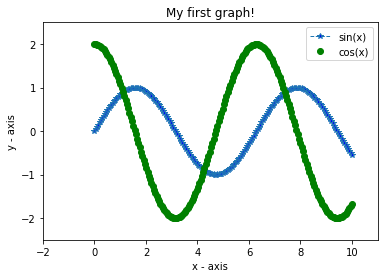

<IPython.core.display.Javascript object>

In [54]:
# Interface 1: The MATLAB-style API
plt.plot(
    x,
    y1sin,
    linestyle="dashed",
    linewidth=1,
    marker="*",
    markerfacecolor="blue",
    label="sin(x)",
)
plt.plot(x, y2cos, "go", linewidth=2, label="cos(x)")

# naming the x axis
plt.xlabel("x - axis")
# naming the y axis
plt.ylabel("y - axis")

# setting x and y axis range
plt.ylim([-2.5, 2.5])
getxlimpara = plt.xlim()
plt.xlim([-2, 11])

# giving a title to my graph
plt.title("My first graph!")

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [55]:
# You can see the full set of line styles by looking at the docstring for plot.
# plt.plot?

<IPython.core.display.Javascript object>

**Disadvantage of using `plplot` interface:**

Note that `plt.xlim()` with no arguments returns the current parameter value. While, `plt.xlim([-2,11])` here sets the plotting range as -2 to 11. One function can be used for two purposes. This may create some confusions.

*Try to see the value of "getxlimpara = plt.xlim()".*

So, programmers usually prefer a more explicit interface -- the object-oriented API, where `AxesSubplot` has two separate functions for `xlim`. There are `ax.get_xlim` and `ax.set_xlim`.


### 2. The object-oriented API
At its core, Matplotlib is object-oriented. We recommend directly working with the objects, if you need more control and customization of your plots.

In many cases you will create a `Figure` and one or more `Axes` using `pyplot.subplots` and from then on only work on these objects. 

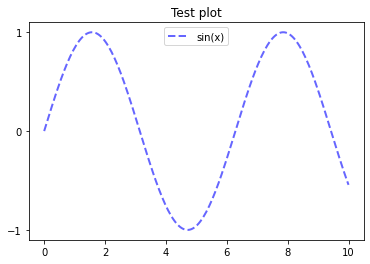

<IPython.core.display.Javascript object>

In [56]:
# Interface 2: The Object-Oriented API
fig, ax = plt.subplots()

ax.plot(x, y1sin, "b--", linewidth=2, label="sin(x)", alpha=0.6)  # $\sin(x)$
ax.legend(loc="upper center")
ax.set_yticks([-1, 0, 1])
ax.set_title("Test plot")
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a Figure instance—like a blank canvas.

- `ax` is an AxesSubplot instance—think of a frame for plotting in.

The `plot()` function is actually a method of `ax`.

`alpha`: transparency

### Multiple Subplots

Sometimes we want multiple subplots in one figure.

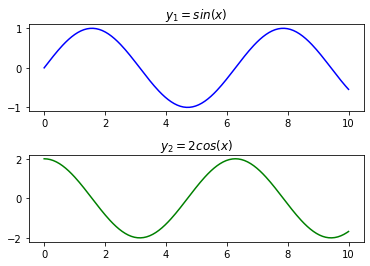

<IPython.core.display.Javascript object>

In [57]:
# subplot sin(x) and 2*cos(x)

# create a figure
fig = plt.figure()

# define subplots and their positions in figure
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# plotting points on each subplot
ax1.plot(x, y1sin, color="b")
ax1.set_title("$y_1 = sin(x)$")

ax2.plot(x, y2cos, color="g")
ax2.set_title("$y_2 = 2cos(x)$")

# adjusting space between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# function to show the plot
plt.show()

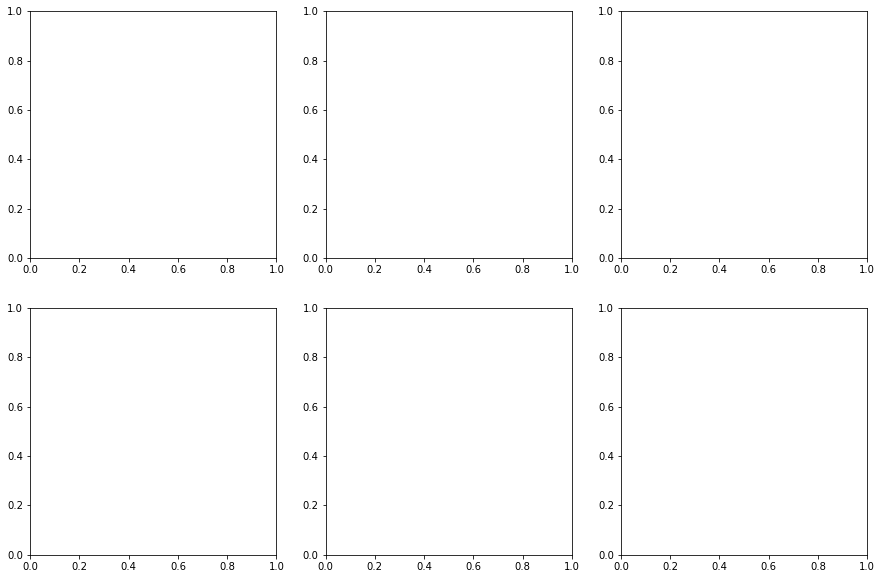

<IPython.core.display.Javascript object>

In [58]:
# Here’s an example that generates 6 histograms
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(15, 10)
)  # sharex=True, sharey=True

Here, `plt.subplots` creates a new figure and returns a NumPy array containing the created subplot objects:

In [59]:
axes[0, 0]

<IPython.core.display.Javascript object>

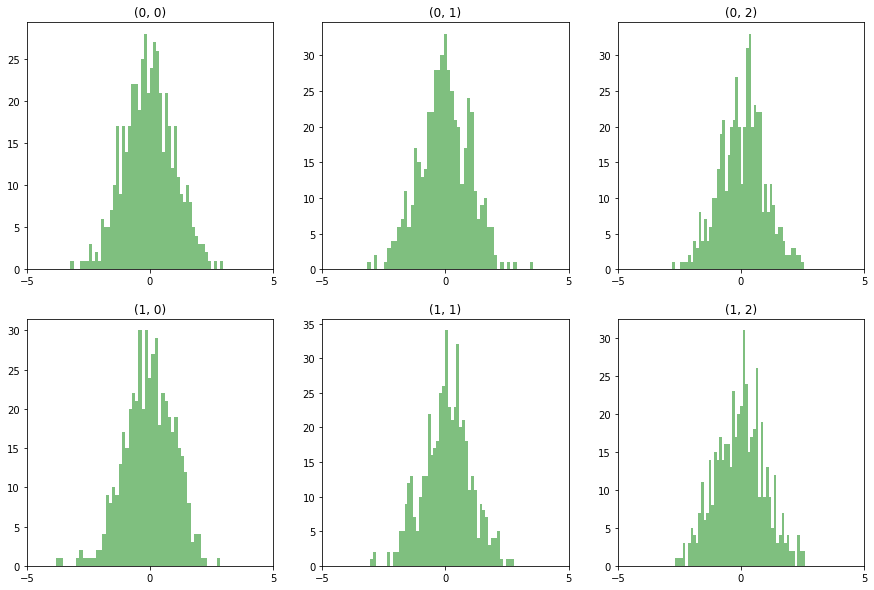

<IPython.core.display.Javascript object>

In [60]:
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

np.random.seed(123)

for i in range(num_rows):
    for j in range(num_cols):
        axes[i, j].hist(np.random.randn(500), bins=50, color="green", alpha=0.5)
        t = f"({i}, {j})"
        axes[i, j].set(title=t, xticks=[-5, 0, 5])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)
plt.show()

### 3. Plotting with [`seaborn`](https://seaborn.pydata.org/)

`matplotlib` can be a fairly low-level tool. Another library is seaborn, a statistical graphics library created
by Michael Waskom. Seaborn simplifies creating many common visualization types.

*Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.*

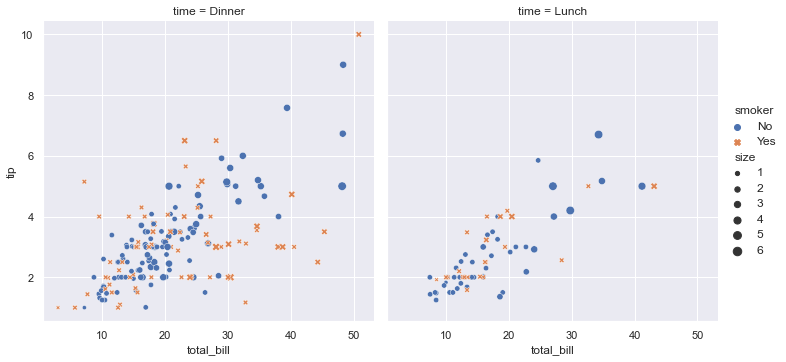

<IPython.core.display.Javascript object>

In [61]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

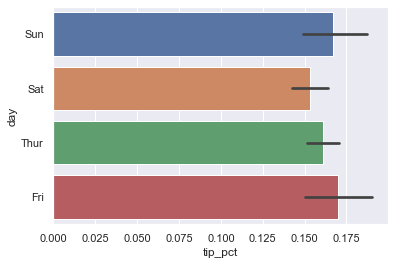

<IPython.core.display.Javascript object>

In [62]:
# the tipping percentage by day with seaborn
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

Because there are multiple observations for each value in the day, the bars are the average value of tip_pct. The
black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).

## Section 5. Compustat example

*What is this? How can we download Compustat?<br>Wharton Research Data Services [(wrds)](https://wrds-www.wharton.upenn.edu/) website description.*

A tutorial of pulling data from wrds using Python is introduced in Chapter 1b.

Let's wrap it up! We are going to use Compustat – North America data as an example. 

At first, please pull the data from library `comp` and table `fundq`, with a where clause on following date range, companies and variables:
- Date range: 2000-01-01 – 2003-12-31
- Companies: Apple (NASDAQ: AAPL) and Microsoft (NASDAQ: MSFT)
- Variables:
    - `gvkey`: A unique identifier and primary key for each company in the database.
    - `datadate`: Data Date
    - `datafqtr`: Fiscal Data Year and Quarter
    - `fyearq`: Fiscal Year 
    - `fqtr`: Fiscal quarter 
    - `tic`: Ticker Symbol 
    - `atq`: total value of assets reported on the Balance Sheet. (in Millions)
    - `capxy`: Capital Expenditures (cumulative within fiscal year) (in Millions)<br>
    *This item represents cash outflow or the funds used for additions to the company's property, plant and equipment, excluding amounts arising from acquisitions, reported in the Statement of Cash Flows.*
    - `ppegtq`: Property, Plant and Equipment - Total (Gross) (in Millions)<br>
    Gross capital value <br>
    *This item represents the cost and/or valuation of tangible fixed assets used in the production of revenue.*
    - `ppentq`: Property Plant and Equipment - Total (Net) (in Millions)<br>
    Net capital value <br>
    *This item represents the cost, less accumulated depreciation, of tangible fixed property used in the production of revenue.*
            ppentq = ppegtq – dpactq (depreciation)
    - `saleq`: Sales/Turnover (Net), same as ‘revtq’. (in Millions)


## Importing Data

You can find the sample of Compustat data in the data folder. 

If you are interested at how I download the data from WRDS, read the following cell:

To pull data from WRDS, you need to have an account, under IU account subscriptions. Please refer to Chapter 1b for more details.

*This Cell Type has been changed to Markdown so that you don't accidentally run the code.*

```python
import wrds
db = wrds.Connection(wrds_username="xxx_Your_WRDS_account_xxx")

# Pull the data from WRDS
time_frames = " (datadate>='2000-01-01' and datadate<='2002-12-31') "
companies = " (tic='AAPL' or tic='MSFT') "

df_fundq = db.raw_sql(
    "select gvkey,conm,datadate,datafqtr,fyearq,fqtr,tic,atq,capxy,ppegtq,ppentq,dpactq,saleq from comp.fundq where ("
    + companies
    + " and "
    + time_frames
    + ")",
    #     date_cols=["datadate"],
)

f_fundq = 'data/fundq_sample.csv'
df_fundq.to_csv(f_fundq, index=False)

# f_fundq = "data/fundq_sample.pkl"
# df_fundq.to_pickle(f_fundq)
```

In [ ]:
# import wrds

# db = wrds.Connection(wrds_username="xxx_Your_WRDS_account_xxx")

In [ ]:
# # Pull the data from WRDS
# time_frames = " (datadate>='2000-01-01' and datadate<='2002-12-31') "
# companies = " (tic='AAPL' or tic='MSFT') "

# df_fundq = db.raw_sql(
#     "select gvkey,conm,datadate,datafqtr,fyearq,fqtr,tic,atq,capxy,ppegtq,ppentq,dpactq,saleq from comp.fundq where ("
#     + companies
#     + " and "
#     + time_frames
#     + ")",
#     #     date_cols=["datadate"],
# )

In [ ]:
# f_fundq = "data/fundq_sample.pkl"
# df_fundq.to_pickle(f_fundq)

In [ ]:
f_fundq = "data/fundq_sample.pkl"
df_fundq = pd.read_pickle(f_fundq)
df_fundq

In [ ]:
df_fundq.columns

In [ ]:
df_fundq.dtypes

## Industry Code: Merge with `comp.company` 
As you can see, there is no industry code (`naics` or `sic`) in the `comp.fundq`. The industry code is in another table, i.e. `comp.company`. We need to pull `company` table and merge it with `df`.

You can find the sample of `comp.company` data in the data folder. The sample provided and used here is just a small set of original table.

If you are interested at how I download the data from WRDS, read the following cell:

*This Cell Type has been changed to Markdown so that you don't accidentally run the code.*

```python
f_company = "data/company_sample.pkl"
df_company = db.get_table(library="comp", table="company")

df_company.iloc[list(range(100)) + [683, 10925], :].to_pickle(f_company)
```

In [ ]:
# f_company = "data/company_sample.pkl"
# df_company = db.get_table(library="comp", table="company")

# df_company.iloc[list(range(100)) + [683, 10925], :].reset_index(drop=True).to_pickle(f_company)

In [ ]:
f_company = "data/company_sample.pkl"
df_company = pd.read_pickle(f_company)

In [ ]:
df_company.columns

In [ ]:
pd.set_option("display.max_columns", None)  # display all columns
df_company

What we need from `comp.company` is the `naics` and `sic` code. To merge with `df`, we can specify the `gvkey` and `conm` as the keys.

In [ ]:
# df = pd.merge(df_fundq, df_company[["conm", "gvkey", "naics", "sic"]], on="gvkey")
# df = pd.merge(df_fundq, df_company[["conm", "gvkey", "naics", "sic"]], on=["gvkey", "conm"], how="right")
df = pd.merge(
    df_fundq, df_company[["conm", "gvkey", "naics", "sic"]], on=["gvkey", "conm"]
)

df

**Note that without specifying the join type, `merge` does an ‘inner’ join. The keys in the result are the intersection.**

In [ ]:
df.dtypes

In [ ]:
# Two way to convert "datadate" type to datetime64[ns]
# 1. General way: astype
df["datadate"].astype("datetime64[ns]").dtype


In [ ]:
# 2. pd.to_datetime
df["datadate"] = pd.to_datetime(df["datadate"], format="%Y-%m-%d")
# infer_datetime_format=True

df["datadate"].dtype

We can generate a calendar quarter variable based on `datadate`.

In [ ]:
df["quarter"] = df["datadate"].dt.to_period("Q")
df.dtypes

`Q-DEC` define regular calendar quarters. To check the definition of the quarter, we can convert it to a monthly frequency. Using the how parameter, we can specify whether to return the starting or ending month.

```python
p = pd.Period("2000Q1", freq="Q-DEC")
p.asfreq("M", how="start")  # Starting month of the 2000Q1
p.asfreq("M", how="end")  # Ending month of the 2000Q1
```
Out:<br>
Period('2000-01', 'M')

Period('2000-03', 'M')

In [ ]:
# format the fiscal quarter to the regular-calendar type
df["datafqtr"] = df["datafqtr"].astype("period[Q-DEC]")

In [ ]:
# Format the fiscal year and quarter to integer
df["fyearq"] = df["fyearq"].astype("int64")
df["fqtr"] = df["fqtr"].astype("int64")

df.dtypes

## Generate a new column: $\log(Total Asset)$

Be careful of any zeros before you take the log.

Try to take a log of 0:
```python
np.log(0)
```
You are going to get an inf result.

In [ ]:
import numpy as np

df.loc[df['atq']==0, 'atq'] = np.nan
df["lasset"] = np.log(df["atq"])

### Lagged term of `lasset`

In [ ]:
df

In [ ]:
df["lasset_l1"] = df.groupby("gvkey")["lasset"].shift(1)

## Create a sector variable as NAICS 2-digit level

In [ ]:
df["naics2d"] = df["naics"].astype(str).str[:2].astype(int)


## Drop columns: `atq`, `dpactq`, `sic`

In [ ]:
df = df.drop(columns=["atq", "dpactq", "sic"])

# Alternative way1:
# df = df.drop(["atq", "dpactq", "sic"], axis=1)

# Alternative way2:
# del df["atq"], df["dpactq"], df["sic"]

In [ ]:
df

## Generate group-wise variables
We want to generate new variables for each firm, such like log change of sales, and investment, and also interpolate gross capital. 

At very first, SORT by firm and datetime!

In [ ]:
df = df.sort_values(by=["gvkey", "datadate"])

### Percentage change in sales

[`.pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)

In [ ]:
df["delta_sales"] = df.groupby(["gvkey"])["saleq"].pct_change()

# # Method 2: using apply
# df["delta_sales2"] = df.groupby(["gvkey"])["saleq"].apply(lambda x: x/x.shift(1) -1)

df

In [ ]:
# df.groupby(["gvkey"])["saleq"].apply(lambda x: x/x.shift(1) -1)

**Note that 0s would result in `inf` when calculating percentage change! <br>Remember to check the new column to avoid future trouble!!!**

In such case, just assign the corresponding values as `np.nan` type.

In [ ]:
df.loc[df["delta_sales"] == np.inf, "delta_sales"] = np.nan

### Investment: net value of capital expenditure

Notice that the raw capital expenditure, `capxy`, is cumulative within certain fiscal year. <br>
We need to recover its quarterly net value.

In [ ]:
df["capxy_net"] = df.groupby(["gvkey", "fyearq"])['capxy'].diff()

df

In [ ]:
df.loc[(df["fqtr"] == 1), "capxy_net"] = df.loc[(df["fqtr"] == 1), "capxy"]

df

### Interpolate Gross Capital Stock (`ppegtq`)
Note:
Researchers use `ppentq` more frequently than `ppegtq`. There are many missing entries of `ppegtq` and few missing in `ppentq`. People usually linearly interpolate `ppentq` to fill in the missing entries. 

Since there is no missing entries of `ppentq` in our data sample, I will just interpolate `ppegtq` as example.

**You can use `transform` to implement the interpolate function.**<br>
[`transform`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html): Call func on self producing a DataFrame with transformed values.
Produced DataFrame will have same axis length as self.

In [ ]:
df["ppegtq_intp"] = df.groupby(["gvkey"])["ppegtq"].transform(
    lambda x: x.interpolate(method="linear")
)

In [ ]:
df[["gvkey", "datafqtr", "ppegtq", "ppegtq_intp"]]

### Generate Investment/Capital ratio

Use more than two variables to generate a new column.

- [df.assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html): Assign new columns to a DataFrame.

- [df.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html): Apply a function along an axis of the DataFrame.

    - axis{0 or ‘index’, 1 or ‘columns’}, default 0<br>
        Axis along which the function is applied:
        - 0 or ‘index’: apply function to each column.
        - 1 or ‘columns’: apply function to each row.

The following three examples show a ratio of $capxy\_net_{t}$ to $ppentq_{t}$. 

Note that in literuture, to represent the usage of investment at time $t$, people usually use the capital stock at period $t-1$, $capital stock_{t-1}$, in the denominator. You are asked to do so in the exercise.

In [ ]:
# 1st method
df["inv_k1"] = df["capxy_net"] / df["ppentq"]

df[["gvkey", "datafqtr", "capxy_net", "ppentq", "inv_k1"]]

In [ ]:
# 2nd method: df.assign
df = df.assign(inv_k2=lambda x: x.capxy_net / x.ppentq)

df[["gvkey", "datafqtr", "capxy_net", "ppentq", "inv_k1", "inv_k2"]]

In [ ]:
# 3rd method
df["inv_k3"] = df.apply(lambda x: x.capxy_net / x.ppentq, axis=1)

df[["gvkey", "datafqtr", "capxy_net", "ppentq", "inv_k1", "inv_k2", "inv_k3"]]

## Descriptive Statistics

In [ ]:
df[["lasset", "lasset_l1", "inv_k1", "delta_sales"]].describe()

In [ ]:
df[["lasset", "lasset_l1", "inv_k1", "delta_sales"]].corr()

#### Exercise 1

Generate a new variable, investment-capital ratio with the lagged term of capital, that is  

$$I\_K\_ratio_t = \dfrac{capxy\_net_{t}}{ppentq_{t-1}}$$

In [ ]:
# insert your code here
df["ppentq_lag1"] = None
df["I_K_ratio"] = None

# df[["gvkey", "fyearq", "capxy_net", "ppentq_lag1", "I_K_ratio"]]

<details><summary>Click here for the solution</summary>

```python
df["ppentq_lag1"] = df.groupby(["gvkey"]).ppentq.shift(1)
df["I_K_ratio"] = df["capxy_net"] / df["ppentq_lag1"]
```

</details>

#### Exercise 2

Generate another new variable, $CapitalStock_{t}$, using law of motion in capital:

$$CapitalStock_t = (1-\delta)*CapitalStock_{t-1} + I_{t}$$

where $CapitalStock_{0}$ is the first available `ppegtq` value, depreciation rate $\delta = 0.1$, and investment $I_{t}$ is `capxy_net`. 

In [ ]:
# insert your code here


# df[["gvkey", "fyearq", "ppegtq", "capxy_net", "CapitalStock"]]

<details><summary>Click here for the solution</summary>

```python
def get_CapitalStock(df):
    if (df.shape[0] <= 2) or (df["ppegtq"].isnull().all()):
        df["CapitalStock"] = np.nan
    else:
        k0_position = df.index.get_loc(df["ppegtq"].first_valid_index())
        k0 = df["ppegtq"].iloc[k0_position]
        k = [np.nan] * k0_position + [k0]

        for index in range(k0_position + 1, df.shape[0]):
            k.append((1.0 - 0.1) * k[-1] + df["capxy_net"].iloc[index])
        df["CapitalStock"] = k
    return df


df = df.groupby(["gvkey"]).apply(get_CapitalStock)
```

</details>